<a href="https://colab.research.google.com/github/yuna1998/statistic-class/blob/main/Mid_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

mount on the drive -> load "train", "test" file

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
filename = '/content/drive/MyDrive/train.csv'

In [6]:
train = pd.read_csv(filename)

In [7]:
filename = '/content/drive/MyDrive/test.csv'

In [8]:
test = pd.read_csv(filename)

Exploratory data anlaysis

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


##Columns explanation

######Survived(생존 여부) : 0(Dead), 1(Survived)

######Pclass(티켓 등급) : 1,2,3

######Sex(성별) : Male, Female

######Age(나이) : XX.X  type

######Sibsp(함께 탑승한 형제자매, 배우자의 수) : 0~

######Parch(함께 탑승한 부모, 자식의 수) : 0~

######Ticket(티켓 번호) : XXXXXX type

######Fare(운임료)

######Cabin(객실번호) : AXXX type

######Embarked(탑승 항구) : C(Cherbourg), Q(Queenstwon), S(Southampton)

Look at train data's, test data's shape 

In [11]:
train.shape

(891, 12)

In [12]:
test.shape

(418, 11)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


if there are null data -> fill or eliminate

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin, Embarked columns have null data cells.

In [17]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age, Cabin columns have null data cells

Visualization this data

In [18]:
sns.set()

create function that show survived which beyond feature(we can see every columns)

In [19]:
def bar_chart(feature):
    survived = train[train['Survived'] ==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index =['Survived','Dead']
    df.plot(kind = 'bar', stacked = True, figsize = (10,5))

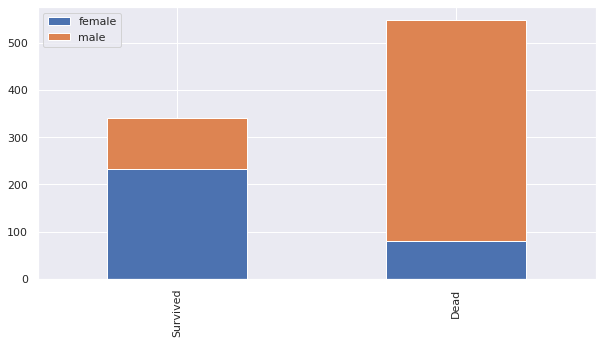

In [20]:
bar_chart('Sex')

The chart confirms Women more likely survied than Man

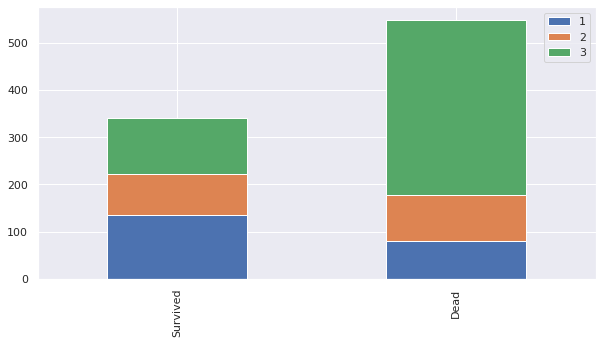

In [21]:
bar_chart("Pclass")

The chart confirms 1st class more likely survied than other classes

The chart confirms 3rd class more likely dead than other classes

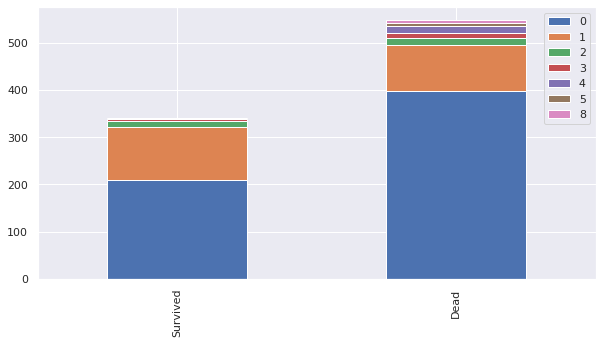

In [22]:
bar_chart('SibSp')

The chart confirms a person aboared without siblings or spouse more likey dead

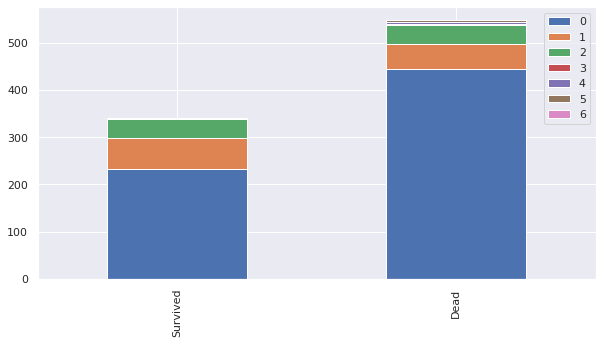

In [23]:
bar_chart('Parch')

The chart confirms a person aboared with more than 2 parents or children more likely survived

The chart confirms a person aboared alone more likely dead

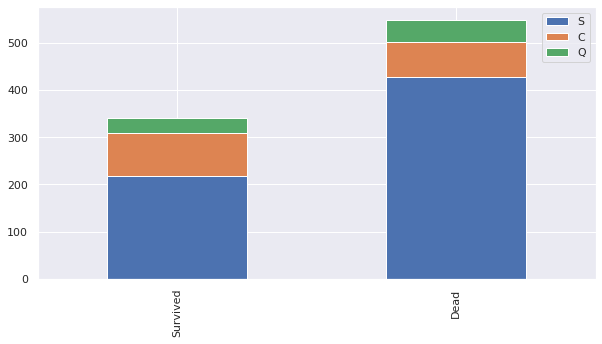

In [24]:
bar_chart('Embarked')

The chart confirms a person aboared from C slightly more likely survived

The chart confirms a person aboared from Q more likely dead

The chart confirms a person aboared from S more likely dead

text에 숫자 값 부여 하는 과정 필요!!

In [26]:
data = [train, test]

for dataset in data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [28]:
title_mapping = {"Mr" : 0, "Miss" : 1, "Mrs" : 2, "Master" : 3, "Dr" : 3,
                  "Rev" : 3, "Col" : 3, "Don" : 3, "Mme" : 3, "Sir" : 3}
for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

Mr : 0, Miss : 1, Mrs : 2, the others : 3

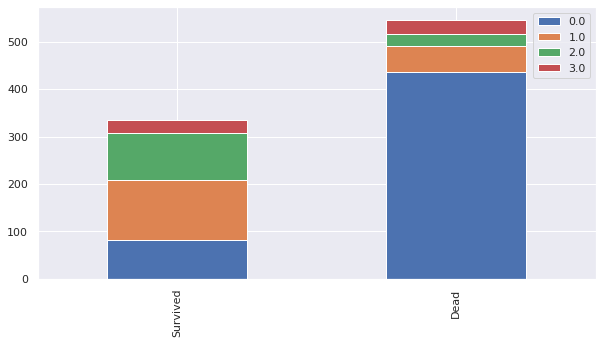

In [30]:
bar_chart('Title')

In [31]:
sex_mapping = {"male" : 0, "female" : 1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

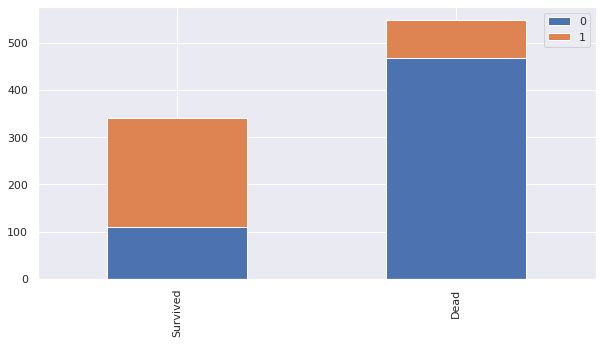

In [32]:
bar_chart('Sex')

We want to see Age columns

But!! There are missing data cells on that columns -> we have to fill that cells

In [34]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace = True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

<function matplotlib.pyplot.show>

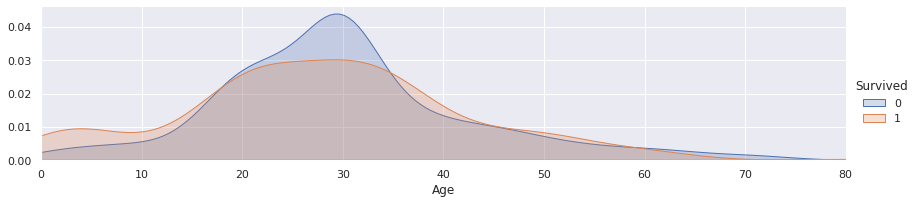

In [35]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim = (0, train['Age'].max()))
facet.add_legend()

plt.show

2~30대가 제일 많이 survived

30대가 제일 많이 dead

-> 0세~20세로 xlim 변경 후 다시 확인

(0.0, 20.0)

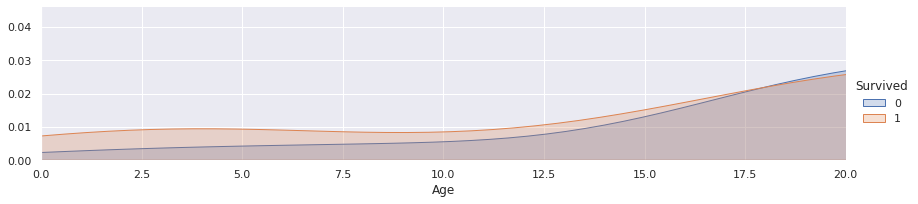

In [37]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim = (0 ,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

The people gets longer, more survived, more dead

20~30대의 분포가 가장 많았으므로, 그 부분 다시 확인 xlim change

(20.0, 30.0)

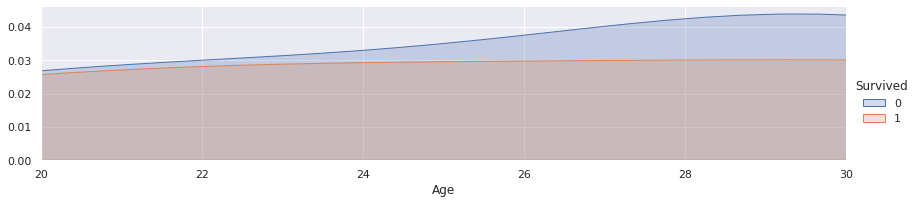

In [38]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Age", shade = True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

In Embarked

We have to fill missing values

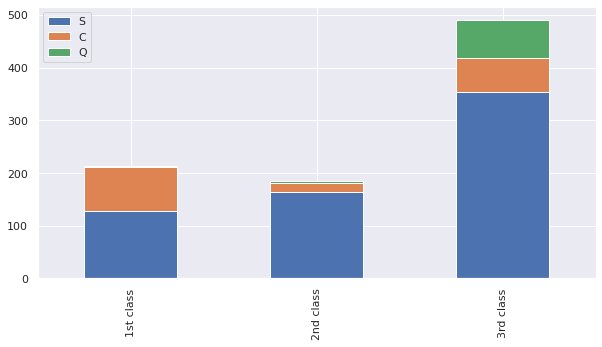

In [49]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class','3rd class']
df.plot(kind = 'bar', stacked = True, figsize = (10,5))

In [50]:
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [51]:
embarked_mapping = {"S" : 0, "C" : 1, "Q" : 2}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

Let's show Fare graph

In [52]:
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace = True)
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace= True)

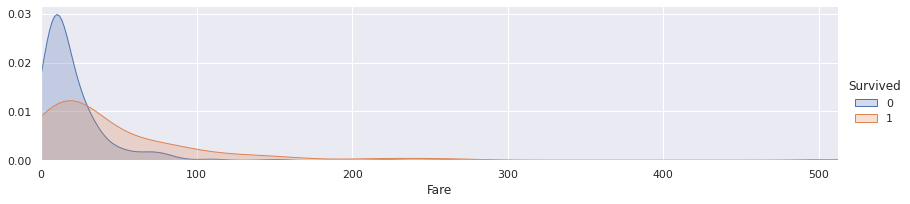

In [54]:
facet = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, "Fare", shade = True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

The chart confirms that low fare -> low survived

In [57]:
for dataset in data:
    dataset.loc[dataset['Fare']<=17, 'Fare'] = 0
    dataset.loc[(dataset['Fare']>17) & (dataset['Fare']<=30), 'Fare'] = 1
    dataset.loc[(dataset['Fare']> 30) & (dataset['Fare']<=100), 'Fare']=2
    dataset.loc[dataset['Fare']>100, 'Fare'] = 3

In [58]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F2             3
              ..
F E69          1
A24            1
C85            1
A34            1
B82 B84        1
Name: Cabin, Length: 147, dtype: int64

There are lots of Cabin types

In [59]:
for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

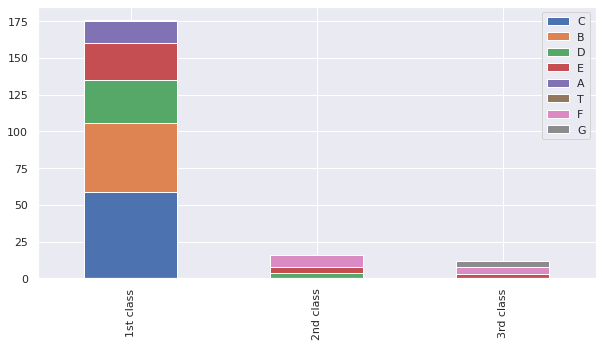

In [62]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

There are A,B,C,D,E,F,G,T type cabins 

In [64]:
cabin_mapping = {"A" : 0, "B" : 0.3, "C" : 0.6, "D" : 0.9,
                 "E" : 1.2, "F" : 1.5, "G" : 1.8, "T" : 2.1}

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

There are missing data cells on Fare columns 

=> fill with median fare 

In [65]:
train['Cabin'].fillna(train.groupby("Pclass")['Cabin'].transform('median'), inplace = True)
test['Cabin'].fillna(test.groupby("Pclass")['Cabin'].transform('median'), inplace = True)

We can make new columsn "Family size"

Set Family Size = Sibsp + Parch + 1(me)

In [66]:
train['Familysize'] = train['SibSp'] + train['Parch'] + 1
test['Familysize'] = test['SibSp'] + test['Parch'] + 1

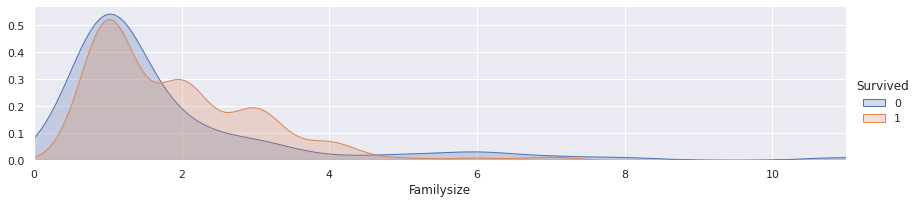

In [69]:
facet = sns.FacetGrid(train, hue = "Survived", aspect = 4)
facet.map(sns.kdeplot, "Familysize", shade = True)
facet.set(xlim = (0, train['Familysize'].max()))
facet.add_legend()

Familysize gets larger -> less survived, dead data

In [70]:
familysize_mapping = {1: 0, 2: 0.4, 3:0.8, 4:1.2,
                      5: 1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in data:
    dataset['Familysize'] = dataset['Familysize'].map(familysize_mapping)

We change ticket, sibsp, parch columns -> we don't use that again. 

drop that columns

In [72]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop ,axis = 1)
train = train.drop(['PassengerId'], axis = 1)
test = test.drop(features_drop, axis = 1)


In [82]:
train_change = train.drop('Survived', axis = 1)
target = train['Survived']

train_change.shape, target.shape

((891, 9), (891,))

In [83]:
train_change = train_change.drop('Name', axis=1)

In [93]:
train_change.head(5)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,3,0,3.0,0.0,1.5,0,0.0,0.4
1,1,1,38.0,2.0,0.6,1,2.0,0.4
2,3,1,3.0,0.0,1.5,0,1.0,0.0
3,1,1,3.0,2.0,0.6,0,2.0,0.4
4,3,0,3.0,0.0,1.5,0,0.0,0.0


In [99]:
train.head(4)

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title,Familysize
0,0,3,"Braund, Mr. Owen Harris",0,3.0,0.0,1.5,0,0.0,0.4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,2.0,0.6,1,2.0,0.4
2,1,3,"Heikkinen, Miss. Laina",1,3.0,0.0,1.5,0,1.0,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,2.0,0.6,0,2.0,0.4


In [100]:
corr = train.corr(method = 'pearson')
print(corr)

            Survived    Pclass       Sex  ...  Embarked     Title  Familysize
Survived    1.000000 -0.338481  0.543351  ...  0.106811  0.447536    0.016639
Pclass     -0.338481  1.000000 -0.131900  ...  0.045702 -0.135008    0.065997
Sex         0.543351 -0.131900  1.000000  ...  0.116569  0.567591    0.200988
Age         0.012748 -0.332597 -0.004730  ... -0.086836  0.063624   -0.037919
Fare        0.292884 -0.693736  0.216932  ... -0.008131  0.271360    0.415087
Cabin      -0.279477  0.864697 -0.093314  ... -0.041238 -0.101110    0.057629
Embarked    0.106811  0.045702  0.116569  ...  1.000000  0.052424   -0.080281
Title       0.447536 -0.135008  0.567591  ...  0.052424  1.000000    0.387206
Familysize  0.016639  0.065997  0.200988  ... -0.080281  0.387206    1.000000

[9 rows x 9 columns]


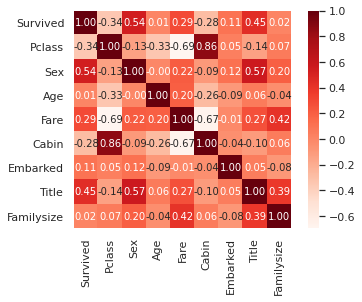

In [104]:
corr_heatmap = sns.heatmap(corr, cbar= True, annot = True, annot_kws={'size' :10},
                           fmt = '.2f', square = True, cmap ='Reds')

in that quarry: '.2f' -> 소수 2째 자리까지 쓰기
cmap : color
annot_kws : 글씨 size

sex, title : 강한 양의 상관관계 보임(Survived와 관련된)